Epoch 1/2
1875/1875 [==============================] - 8s 3ms/step - loss: 0.9045 - accuracy: 0.7343 - val_loss: 0.4473 - val_accuracy: 0.9008
Epoch 2/2
313/313 [==============================] - 1s 1ms/step


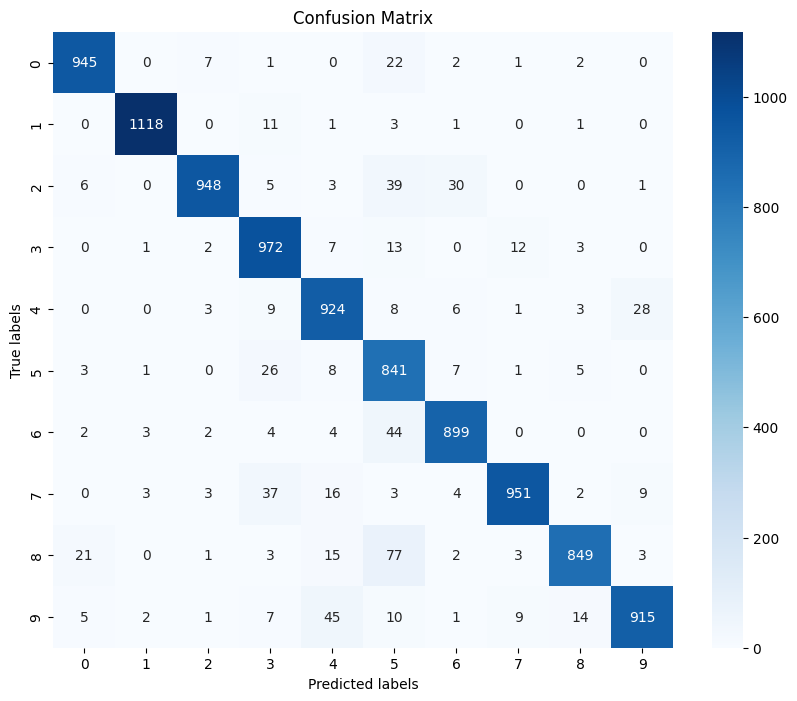

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import GlorotUniform, HeNormal, RandomNormal, RandomUniform
from tensorflow.keras.activations import relu, elu, selu, softmax
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer

    Dense(128, activation=relu, kernel_initializer=GlorotUniform()),  # Layer 1
    Dense(64, activation=elu, kernel_initializer=HeNormal()),  # Layer 2
    Dense(32, activation=selu, kernel_initializer=RandomNormal()),  # Layer 3
    Dense(16, activation=relu, kernel_initializer=RandomUniform()),  # Layer 4
    Dense(8, activation=elu, kernel_initializer=GlorotUniform()),  # Layer 5
    Dense(4, activation=selu, kernel_initializer=HeNormal()),  # Layer 6
    Dense(2, activation=relu, kernel_initializer=RandomNormal()),  # Layer 7
    Dense(4, activation=elu, kernel_initializer=RandomUniform()),  # Layer 8
    Dense(8, activation=selu, kernel_initializer=GlorotUniform()),  # Layer 9
    Dense(10, activation=softmax, kernel_initializer=HeNormal())  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_test, y_test))

# Predict labels for the test set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
